# Personalized Meal Type Prediction 


## Project Overview

HelloFresh is a global meal kit delivery company that helps people cook at home by sending fresh ingredients and step-by-step recipes. Since starting in 2011 it has grown to serve millions of customers around the world, focusing on convenience, healthy meals, and options that fit different diets and preferences.

This project explores how to make meal recommendations more personal. Right now, suggestions are usually based on filters customers choose, but there’s room to make the experience smarter. Using recipe and review data from Food.com, the goal was to build a model that can predict what kind of meal—like breakfast, lunch, dinner, snack, or dessert a person might enjoy, helping make meal planning easier and more tailored to individual tastes.

## Problem Statement

HelloFresh aims to predict which meal types customers are most likely to enjoy based on their past interactions with recipes, including ratings, reviews, and cooking preferences. The challenge is to effectively analyze complex user behavior from diverse recipe data and create an accurate, personalized meal recommendation system that can scale to a large customer base.

## Objectives

1. **Data Collection & Cleaning:** Load and preprocess recipes and reviews data to prepare it for analysis.

2.  **Exploratory Data Analysis (EDA):** Understand data distribution, identify key features, and detect missing values or anomalies.

3.  **Feature Engineering:** Develop meaningful features from user interaction data to capture meal preferences.

3. **Model Building:** Implement classification models to predict personalized meal types.

4. **Model Evaluation:** Use appropriate metrics and validation techniques to assess model accuracy and reliability.

5.  **Recommendations:** Provide actionable insights to HelloFresh for enhancing personalized meal kit offerings based on model results.

In [7]:
!ls

Dataset
Hellofresh.ipynb


## 1. Data Collection

READ FILES IN DATASET FOLDER

Reference: [Youtube](https://www.youtube.com/watch?v=NyS4l8RGFjk)

In [8]:
import os

#list all files inthe Dataset folder

files = os.listdir('Dataset')
files

['recipes.csv', 'recipes.parquet', 'reviews.csv', 'reviews.parquet']

In [4]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:
# Load  Datasets

recipes = pd.read_csv("Dataset/recipes.csv")
reviews = pd.read_csv("Dataset/reviews.csv")



## 2.  EDA - Exploratory Data Analysis

**RECIPES DATASET**

In [12]:
#First 5 rows Preview

recipes.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [11]:
# Recipes dataset structure

recipes.shape
recipes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

In [16]:
#Summary Statistics
recipes.describe()

,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,522517.000000,5.225170e+05,269294.000000,275028.000000,522517.000000,522517.000000,522517.000000,522517.000000,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000,339606.000000
mean,271821.436970,4.572585e+07,4.632014,5.227784,484.438580,24.614922,9.559457,86.487003,7.672639e+02,49.089092,3.843242,21.878254,17.469510,8.606191
std,155495.878422,2.929714e+08,0.641934,20.381347,1397.116649,111.485798,46.622621,301.987009,4.203621e+03,180.822062,8.603163,142.620191,40.128837,114.319809
min,38.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,137206.000000,6.947400e+04,4.500000,1.000000,174.200000,5.600000,1.500000,3.800000,1.233000e+02,12.800000,0.800000,2.500000,3.500000,4.000000
50%,271758.000000,2.389370e+05,5.000000,2.000000,317.100000,13.800000,4.700000,42.600000,3.533000e+02,28.200000,2.200000,6.400000,9.100000,6.000000
75%,406145.000000,5.658280e+05,5.000000,4.000000,529.100000,27.400000,10.800000,107.900000,7.922000e+02,51.100000,4.600000,17.900000,25.000000,8.000000
max,541383.000000,2.002886e+09,5.000000,3063.000000,612854.600000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000,32767.000000


In [17]:
#Check for missing Values

recipes.isnull().sum()


RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

In [18]:
#Check for Duplicates

recipes.duplicated().sum()

0

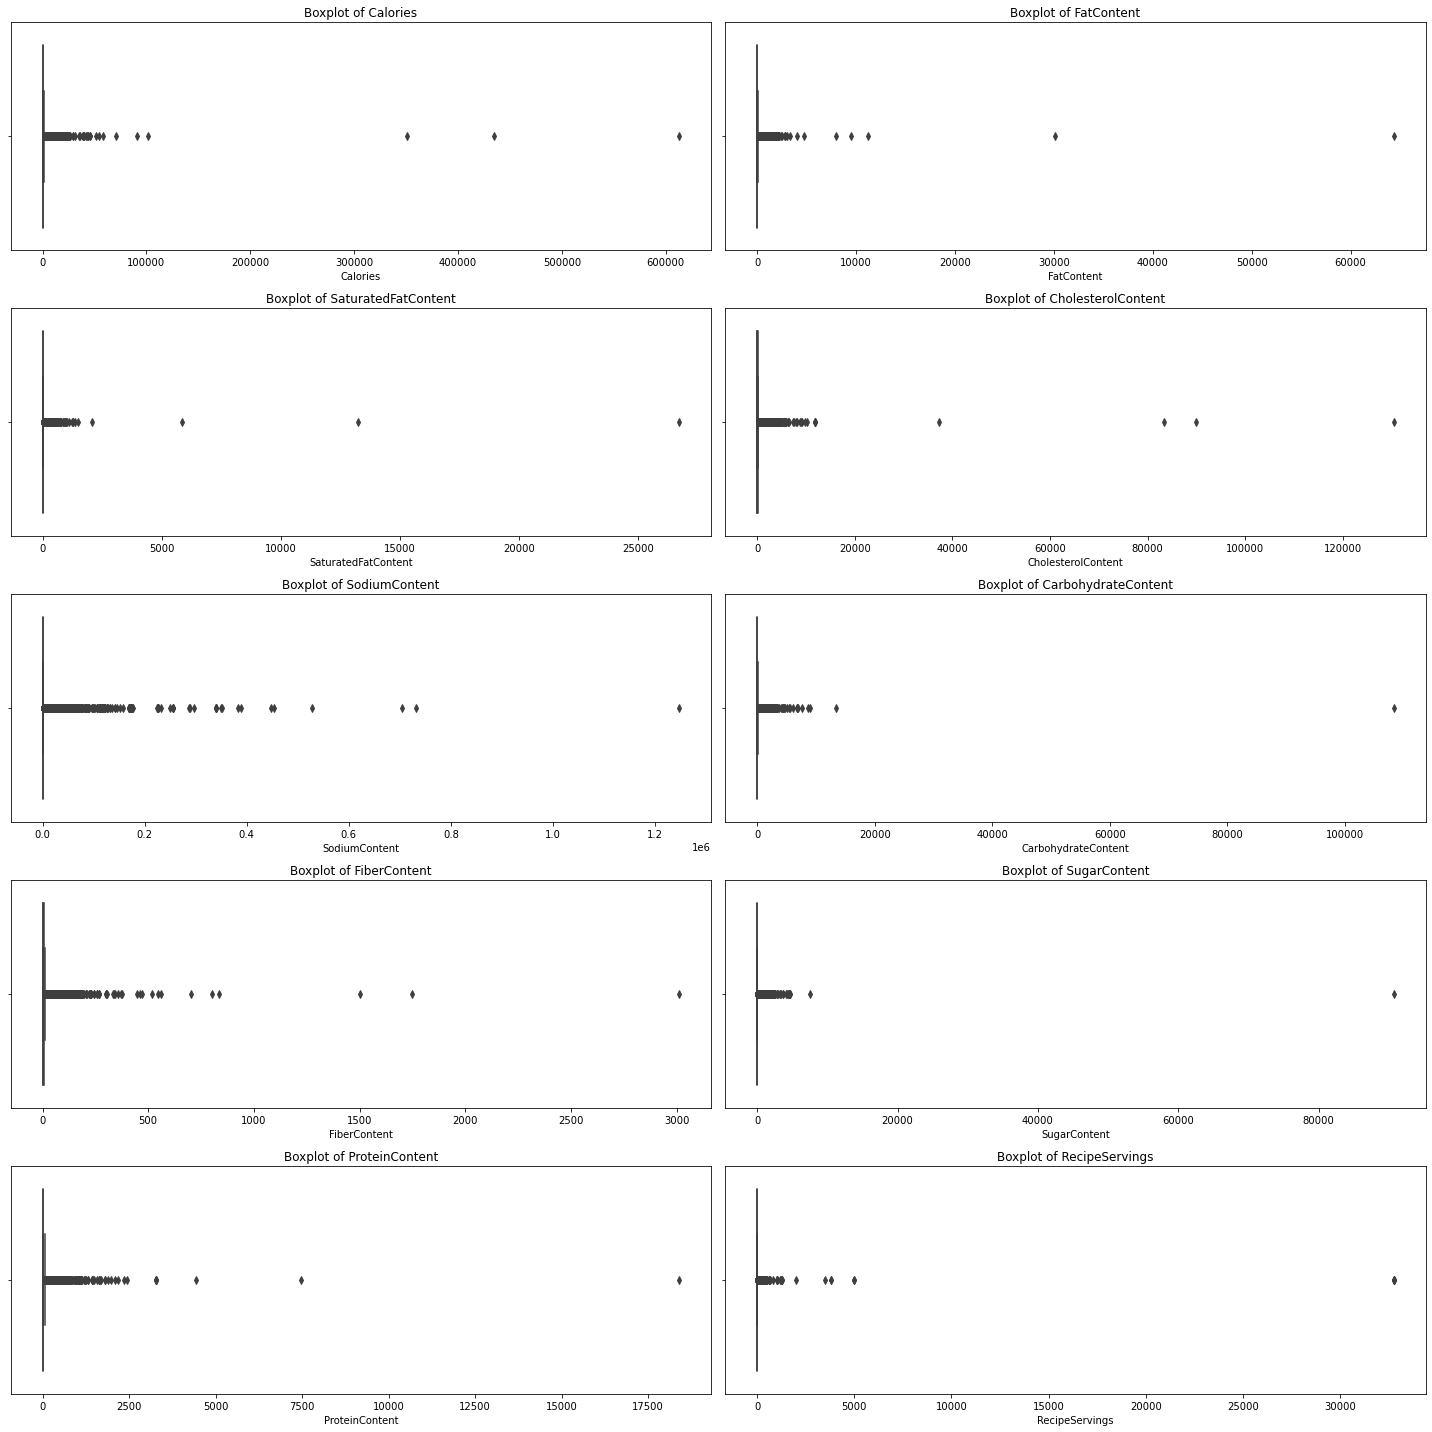

In [23]:
# check for outliers
# numerical columns for outlier detection
num_cols = [
    'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
    'SodiumContent', 'CarbohydrateContent', 'FiberContent',
    'SugarContent', 'ProteinContent', 'RecipeServings'
]

#Plot

plt.figure(figsize=(20, 20))
for i, col in enumerate(num_cols):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(x=recipes[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


**REVIEWS DATASET**

In [13]:
#First 5 rows Preview

reviews.head()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25T21:44:00Z,2000-01-25T21:44:00Z
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17T16:49:59Z,2001-10-17T16:49:59Z
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25T09:00:00Z,2000-02-25T09:00:00Z
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13T21:15:00Z,2000-03-13T21:15:00Z
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28T12:51:00Z,2000-03-28T12:51:00Z


In [15]:
# Reviews dataset structure

reviews.shape
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ReviewId       1401982 non-null  int64 
 1   RecipeId       1401982 non-null  int64 
 2   AuthorId       1401982 non-null  int64 
 3   AuthorName     1401982 non-null  object
 4   Rating         1401982 non-null  int64 
 5   Review         1401768 non-null  object
 6   DateSubmitted  1401982 non-null  object
 7   DateModified   1401982 non-null  object
dtypes: int64(4), object(4)
memory usage: 85.6+ MB


In [21]:
#Summary Statistics
recipes.describe()

,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,522517.000000,5.225170e+05,269294.000000,275028.000000,522517.000000,522517.000000,522517.000000,522517.000000,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000,339606.000000
mean,271821.436970,4.572585e+07,4.632014,5.227784,484.438580,24.614922,9.559457,86.487003,7.672639e+02,49.089092,3.843242,21.878254,17.469510,8.606191
std,155495.878422,2.929714e+08,0.641934,20.381347,1397.116649,111.485798,46.622621,301.987009,4.203621e+03,180.822062,8.603163,142.620191,40.128837,114.319809
min,38.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,137206.000000,6.947400e+04,4.500000,1.000000,174.200000,5.600000,1.500000,3.800000,1.233000e+02,12.800000,0.800000,2.500000,3.500000,4.000000
50%,271758.000000,2.389370e+05,5.000000,2.000000,317.100000,13.800000,4.700000,42.600000,3.533000e+02,28.200000,2.200000,6.400000,9.100000,6.000000
75%,406145.000000,5.658280e+05,5.000000,4.000000,529.100000,27.400000,10.800000,107.900000,7.922000e+02,51.100000,4.600000,17.900000,25.000000,8.000000
max,541383.000000,2.002886e+09,5.000000,3063.000000,612854.600000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000,32767.000000


In [19]:
#Check for missing Values

reviews.isnull().sum()

ReviewId           0
RecipeId           0
AuthorId           0
AuthorName         0
Rating             0
Review           214
DateSubmitted      0
DateModified       0
dtype: int64

In [20]:
#Check for Duplicates

reviews.duplicated().sum()

0

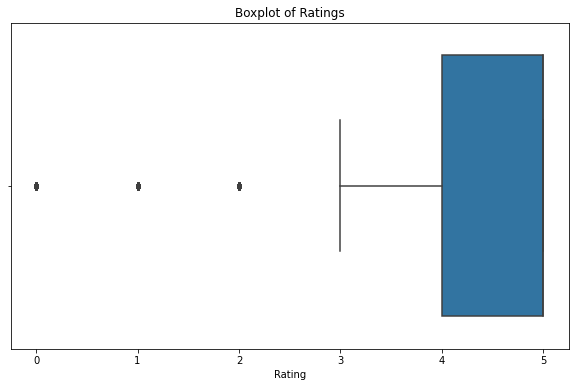

In [24]:
# check for outliers

plt.figure(figsize=(10, 6))
sns.boxplot(x=reviews['Rating'])
plt.title('Boxplot of Ratings')
plt.xlabel('Rating')
plt.show()

## FINDINGS

**Recipes Dataset**

  →CookTime,RecipeCategory,Keywords,AggregatedRating,ReviewCount,RecipeServings,RecipeYield columns have missing values

→No duplicates

→ 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
    'SodiumContent', 'CarbohydrateContent', 'FiberContent',
    'SugarContent', 'ProteinContent', 'RecipeServings' columns have outliers
    
→ CookTime, PrepTime, TotalTime, DatePublished have incorrect datatype

**Reviews Dataset**

→ Review column has missing values

→ No duplicates

→ Rating column has outliers

## Data Preprocessing

**CLEANING RECIPES DATASET**

In [45]:
# 1. Handle missing Values


#make a copy before cleaning

recipes1 = recipes

## Drop rows with missing essential values
recipes1.dropna(subset=['AggregatedRating', 'ReviewCount', 'RecipeCategory'], inplace=True)

# RecipeServing fill null with median
recipes1['RecipeServings'].fillna(recipes['RecipeServings'].median(), inplace=True)

# Drop less critical/heavily missing columns 
recipes1.drop(columns=['RecipeYield', 'Keywords'], inplace=True)




KeyError: "['RecipeYield' 'Keywords'] not found in axis"

**Convert CookTime, PrepTime, TotalTime to minutes**

Reference: how to convert Iso duration to minutes in  python

(https://stackoverflow.com/questions/72230642/how-to-convert-iso-duration-to-minutes-in-pyspark-or-python?utm_source=chatgpt.com)

(https://pypi.org/project/isodate/)

(https://www.reddit.com/r/learnpython/comments/aeb5lw/converting_iso8601_to_days_or_minutes_or_seconds/?utm_source=chatgpt.com)



In [37]:
#2. convert Iso duration to minutes 

import re

def convert_time_to_minutes(duration):
    if pd.isnull(duration):
        return None
    
    # use regex to extract hours and minutes
    
    pattern = r'PT(?:(\d+)H)?(?:(\d+)M)?'
    match = re.match(pattern, duration)
    if not match:
        return None
    hours = int(match.group(1)) if match.group(1) else 0
    minutes = int(match.group(2)) if match.group(2) else 0
    return hours * 60 + minutes




In [38]:
#convert CookTime,PrepTime, TotalTime to new cols

for col in ['CookTime', 'PrepTime', 'TotalTime']:
    recipes1[col] = recipes1[col].apply(convert_time_to_minutes)


In [40]:
#check if it worked

recipes1.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,1440.0,45,1485,1999-08-09 21:46:00+00:00,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,25.0,240,265,1999-08-29 13:12:00+00:00,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,5.0,30,35,1999-09-05 19:52:00+00:00,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,20.0,1440,1460,1999-09-03 14:54:00+00:00,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,30.0,20,50,1999-09-19 06:19:00+00:00,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,"c(""Mix everything together and bring to a boil..."


In [41]:
 # Handle missing values in CookTimeMinutes with the mode

# Calculate the mode

cooktime_mode = recipes1['CookTime'].mode()[0]

#fill missing value with mode
recipes1['CookTime'] = recipes1['CookTime'].fillna(cooktime_mode)



In [46]:
#3. FIX DATA TYPES

# Convert DatePublished to datetime

recipes1['DatePublished'] = pd.to_datetime(recipes1['DatePublished'], errors='coerce')


In [43]:
#check if it worked

recipes1.head()
recipes1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269049 entries, 0 to 522431
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   RecipeId                    269049 non-null  int64              
 1   Name                        269049 non-null  object             
 2   AuthorId                    269049 non-null  int64              
 3   AuthorName                  269049 non-null  object             
 4   CookTime                    269049 non-null  float64            
 5   PrepTime                    269049 non-null  int64              
 6   TotalTime                   269049 non-null  int64              
 7   DatePublished               269049 non-null  datetime64[ns, UTC]
 8   Description                 269046 non-null  object             
 9   Images                      269048 non-null  object             
 10  RecipeCategory              269049 non-null 

In [47]:
#4. Remove outliers Using IQR Method

num_cols = [
    'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
    'SodiumContent', 'CarbohydrateContent', 'FiberContent',
    'SugarContent', 'ProteinContent', 'RecipeServings'
]

def remove_outliers_iqr(recipes1, num_cols):
    recipes1_clean = recipes1.copy()
    for col in num_cols:
        Q1 = recipes1_clean[col].quantile(0.25)
        Q3 = recipes1_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
        recipes1_clean = recipes1_clean[
            (recipes1_clean[col] >= lower_bound) & (recipes1_clean[col] <= upper_bound)
        ]
        
    return recipes1_clean

# function to remove outliers
recipes1_clean = remove_outliers_iqr(recipes1, num_cols)



In [48]:
#Check if it worked

print("Original shape:", recipes1.shape)
print("Cleaned shape:", recipes1_clean.shape)


Original shape: (269049, 26)
Cleaned shape: (153139, 26)


**CLEANING REVIEWS DATASET**

In [52]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ReviewId       1401982 non-null  int64 
 1   RecipeId       1401982 non-null  int64 
 2   AuthorId       1401982 non-null  int64 
 3   AuthorName     1401982 non-null  object
 4   Rating         1401982 non-null  int64 
 5   Review         1401768 non-null  object
 6   DateSubmitted  1401982 non-null  object
 7   DateModified   1401982 non-null  object
dtypes: int64(4), object(4)
memory usage: 85.6+ MB


In [53]:
#Make a copy

reviews1 = reviews

#1. Handle missing Values 

#drop rows with missing review text

reviews1 = reviews1.dropna(subset=['Review'])


In [55]:
#2. Remove outliers from 'Rating' column using IQR

Q1 = reviews1['Rating'].quantile(0.25)
Q3 = reviews1['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


reviews1 = reviews1[
    (reviews1['Rating'] >= lower_bound) &
    (reviews1['Rating'] <= upper_bound)
    ]

# check if it worked
print("Cleaned reviews shape:", reviews1.shape)
reviews1.info()


Cleaned reviews shape: (1011912, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011912 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ReviewId       1011912 non-null  int64 
 1   RecipeId       1011912 non-null  int64 
 2   AuthorId       1011912 non-null  int64 
 3   AuthorName     1011912 non-null  object
 4   Rating         1011912 non-null  int64 
 5   Review         1011912 non-null  object
 6   DateSubmitted  1011912 non-null  object
 7   DateModified   1011912 non-null  object
dtypes: int64(4), object(4)
memory usage: 69.5+ MB


## 3. FEATURE ENGINEERING

In [59]:
#1. Merge Cleaned Recipes And Reviews

RecipeInsights = pd.merge(recipes1_clean,reviews1, on='RecipeId', how='inner')
RecipeInsights.head()

,RecipeId,Name,AuthorId_x,AuthorName_x,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,ProteinContent,RecipeServings,RecipeInstructions,ReviewId,AuthorId_y,AuthorName_y,Rating,Review,DateSubmitted,DateModified
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,1440.0,45,1485,1999-08-09 21:46:00+00:00,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.2,4.0,"c(""Toss 2 cups berries with sugar."", ""Let stan...",579149,596506,allisonsmommy,5,"Yummy, yummy, yummy! I am a big fan of fruit a...",2008-02-13T00:26:49Z,2008-02-13T00:26:49Z
1,42,Cabbage Soup,1538,Duckie067,30.0,20,50,1999-09-19 06:19:00+00:00,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,4.3,4.0,"c(""Mix everything together and bring to a boil...",46368,71084,smurfy57,5,This is a very good soup. We served ours warm...,2003-03-25T11:31:51Z,2003-03-25T11:31:51Z
2,42,Cabbage Soup,1538,Duckie067,30.0,20,50,1999-09-19 06:19:00+00:00,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,4.3,4.0,"c(""Mix everything together and bring to a boil...",804233,1060485,allyop135,5,VERY GOOD! in both texture and taste! awesome ...,2009-02-05T20:29:02Z,2009-02-05T20:29:02Z
3,42,Cabbage Soup,1538,Duckie067,30.0,20,50,1999-09-19 06:19:00+00:00,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,4.3,4.0,"c(""Mix everything together and bring to a boil...",863050,99678,Pollywog,5,I am a big fan of cooked cabbage and anything ...,2009-05-06T00:11:04Z,2009-05-06T00:11:04Z
4,45,Buttermilk Pie With Gingersnap Crumb Crust,1580,tristitia,50.0,30,80,1999-08-06 00:40:00+00:00,Make and share this Buttermilk Pie With Ginger...,"""https://img.sndimg.com/food/image/upload/w_55...",...,4.2,8.0,"c(""Preheat oven to 350°F."", ""Make pie crust, u...",66634,81611,annlouise,5,This was my first buttermilk pie (I had never ...,2003-09-07T22:08:02Z,2003-09-07T22:08:02Z


**Save The Merged DataFrame**

In [60]:
#save as a pickle file (preserves data types better)

RecipeInsights.to_pickle('RecipeInsights.pkl')
